# Prikazovanje podatkov

# Plotting data

## Knjižnica `matplotlib`

Matplotlib je knjižnica za 2D in 3D risanje v programskem jeziku Python. Vključuje:

* Nadzor nad posameznimi elementi slike.
* Izvoz rezultatov v obliki PNG, PDF, SVG, EPS, in PGF.
* Podpora sintaksi $\LaTeX$

Bistven del uporabnosti knjižnice je, da lahko slike v celoti zgradimo z uporabo ukazov, kar odstrani potrebo po ročnem urejanju. Slednje jo dela zelo primerno za uporabo v znanstvenem delu, kjer lahko generiramo kompleksne prikaze na različnih podatkih brez potrebe po spremembi programske kode.

Spletna stran knjižnice je tudi bogat vir dodatnih primerov: http://matplotlib.org/

## Library `matplotlib`

Matplotlib is a library for 2D and 3D drawing in the Python programming language. It includes:

* Controlling individual image elements.
* Export results in the form of PNG, PDF, SVG, EPS, and PGF.
* Support $\LaTeX$ syntax

An essential part of the library's usefulness is that images can be built entirely using commands, which eliminates the need for manual editing. The latter works very well for use in scientific work, where we can generate complex visualizations on various data without the need to change the program code.

The library's website is also a rich source of additional examples: http://matplotlib.org/

In [1]:
%matplotlib inline
import matplotlib
%config InlineBackend.figure_format = 'jpg'
matplotlib.figure.Figure.__repr__ = lambda self: (
    f"<{self.__class__.__name__} size {self.bbox.size[0]:g}"
    f"x{self.bbox.size[1]:g} with {len(self.axes)} Axes>")
import matplotlib.pyplot as plt
plt.style.use('PR.mplstyle')

matplotlib.__version__

'2.1.0'

Enostavna slika v okolju `matplotlib`:

Simple picture in the `matplotlib` environment:

In [2]:
import numpy as np
np.random.seed(42)

x = np.linspace(0, 5, 10)
y = x ** 2

Funkcija `plot` sprejema parametre:
* podatki na ordinati, 
* podatki na abscisi, 
* ostali parametri (oblikovanje, ...)

The `plot` function accepts parameters:
* data on ordinate,
* data on abscissa,
* other parameters (formatting, ...)

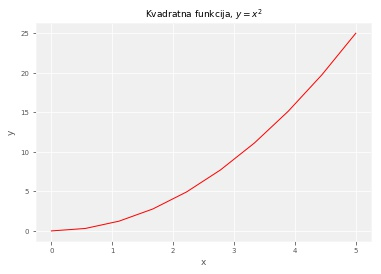

In [3]:
plt.figure()
plt.plot(x, y, 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kvadratna funkcija, $y=x^2$');

##### Vprašanje 2-1-1

Nariši funkcije $x^{-3}$, $x^{-2}$, $x^{-1}$, $x^0$, $x^1$, $x^2$, $x^3$ na intervalu $(0, 5]$. To dosežeš z večkratnim klicanjem funkcije `plot`, po enkrat za vsako krivuljo.

##### Question 2-1-1

Draw functions $x^{-3}$, $x^{-2}$, $x^{-1}$, $x^0$, $x^1$, $x^2$, $x^3$ on the interval $(0, 5]$. This is accomplished by repeatedly calling the `plot` function, once for each curve.

In [4]:
# Nariši funkcije na isti graf
# ...

[Odgovor](202-1.ipynb#Odgovor-2-1-1)

[Answer](202-1.ipynb#Answer-2-1-1)

Z uporabo okolja `subplot` lahko ustvarimo sliko z več platni.

Using the `subplot` environment, we can create an image with multiple figures.

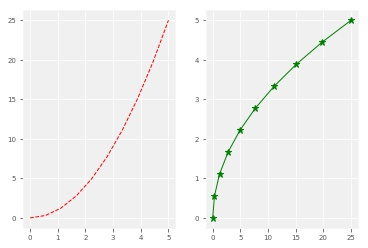

In [5]:
plt.subplot(1, 2, 1)    # ustvari sliko z 1 x 2 platnoma in izberi prvo platno
plt.plot(x, y, 'r--')   # nariši podatke
plt.subplot(1, 2, 2)    # na isti sliki izberi drugo platno
plt.plot(y, x, 'g*-');  # ...

### Objektno usmerjen način dela z `matplotlib`

V zgornjih primerih smo uporabljali vmesnik, kjer je bila vsaka slika del *globalnega* okolja. Ta način je uporaben za preprostejše slike. Zahtevnejše prikaze pa omogoča objektno usmerjen način, posebej v primerih, ko imamo opravka z več kot eno sliko naenkrat.

Bistveni del objektno-usmerjenega okolja sta objekta **slika** (ang. *figure*) in **os** (ang. *axis*). Ena slika vsebuje eno ali več osi. Os je vsebovalnik s koordinatnim sistemom, v katerega rišemo objekte (črte, stolpce, oblike, ...). 


Ustvarimo novo sliko v spremenljivki `fig` ter ji dodajmo novo os, do katere dostopamo preko spremenljivke `axes`.

### An object-oriented way of working with `matplotlib`

In the above examples, we used an interface where each image was part of the *global* environment. This mode is useful for simpler images. The object-oriented way provides advanced visualizations, especially in cases where we deal with more than one image at a time.

Two essential parts of an object-oriented environment are the objects **figure** and **axis**. One image contains one or more axes. Axis is a container with a coordinate system in which we draw objects (lines, columns, shapes, ...).

Create a new image in the `fig` variable and add it to the new axis, accessed via the `axes` variable.

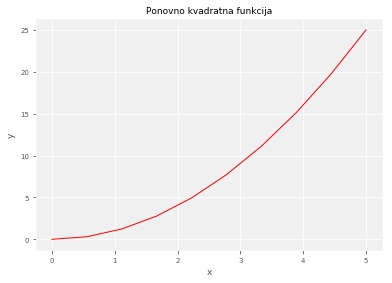

In [6]:
fig = plt.figure()

# poskušaj spreminjati parametre
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # x koordinata osi relativno na sliko,
                                          # y koordinata osi relativno na sliko,
                                          # širina,
                                          # višina

axes.plot(x, y, 'r')

axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Ponovno kvadratna funkcija');

Sedaj imamo popoln nadzor nad vstavljanjem osi. Na sliko lahko dodamo poljubno število osi, ki se lahko tudi prekrivajo. 

Now we have complete control over the insertion of the axis. You can add an arbitrary number of axes to the picture, which may also overlap.

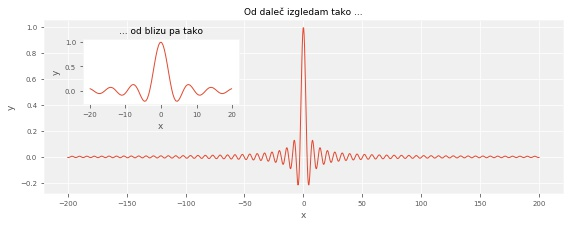

In [7]:
fig = plt.figure(figsize=(9, 3))

x = np.linspace(-200, 200, 1000)
y = np.sin(x)/x

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])  # glavna os
axes2 = fig.add_axes([0.16, 0.51, 0.24, 0.3], facecolor='white') # os znotraj glavne osi.
# pomemben je tudi vrstni red ustvarjanja!

# Prikazi večji interval
axes1.plot(x, y)
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('Od daleč izgledam tako ...')

# Prikaži okolico ničle
axes2.plot(x[450:550], y[450:550])
axes2.set_xlabel('x')
axes2.set_ylabel('y')
axes2.set_title('... od blizu pa tako');

Za osi razporejene v lepo urejeno mrežo lahko uporabljamo upravljalnik `subplots`.

For the axes arranged in a nicely arranged network, we can use the `subplots` manager.

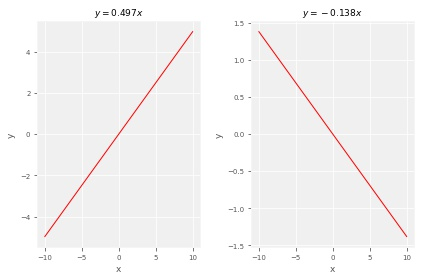

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2)

x = np.linspace(-10, 10, 100)

for ax in axes:                    # sprehodimo se po oseh
    k = np.random.randn(1, 1)[0]   # narišimo naključno premico
    y = k * x 
    
    ax.plot(x, y, 'r')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('$y = %.3f x$'% k )
    
fig.tight_layout()   # poskrbi da se osi ne prekrivajo

### Barvanje

### Coloring

Najenostavnejši načina za nastavljanje barv je slog, podoben okolju MATLAB; `g` predstavlja zeleno barvo, `b` modro, `r` rdečo, itd.

The simplest way to adjust the colors is a style that is similar to the MATLAB environment; `g` represents the green color, `b` blue, `r` red, etc.

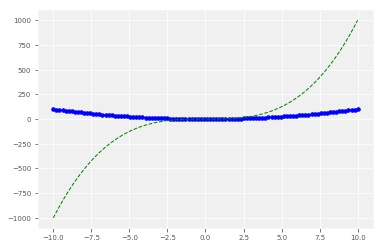

In [9]:
plt.figure()
plt.plot(x, x**2, 'b.-') # modra črta s označenimi točkami
plt.plot(x, x**3, 'g--'); # green dashed line

Lahko pa uporabimo argument `color=...`, kjer barvo podamo z njenim imenom oz. RGB kodo. 

Alternatively, use the `color = ...` argument where the color is given by its name or RGB code.

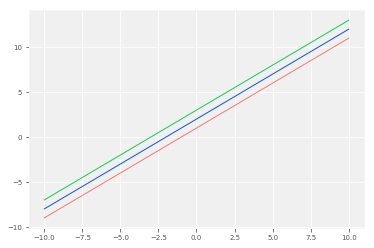

In [10]:
plt.figure()
plt.plot(x, x+1, color="red", alpha=0.5) # Parameter alpha določa transparentnost; preizkusi!
plt.plot(x, x+2, color="#1155dd")        
plt.plot(x, x+3, color="#15cc55");

### Stili

### Styles

Poizkusimo spreminjati še ostale lastnosti: debelino črt in različne oznake za točke.

Let's try to change the other properties: the thickness of the lines and different point markings.

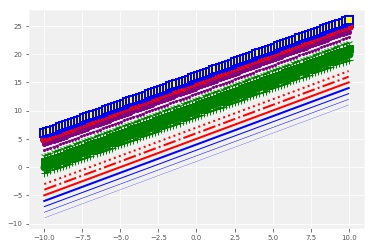

In [11]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", linewidth=0.25)
ax.plot(x, x+2, color="blue", linewidth=0.50)
ax.plot(x, x+3, color="blue", linewidth=1.00)
ax.plot(x, x+4, color="blue", linewidth=2.00)

# možnosti za izgled črte so ‘-‘, ‘--’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="red", lw=2, linestyle='-')
ax.plot(x, x+6, color="red", lw=2, ls='-.')
ax.plot(x, x+7, color="red", lw=2, ls=':')


# oznake za točke: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="green", lw=2, ls='--', marker='+')
ax.plot(x, x+10, color="green", lw=2, ls='--', marker='o')
ax.plot(x, x+11, color="green", lw=2, ls='--', marker='s')
ax.plot(x, x+12, color="green", lw=2, ls='--', marker='1')

# velikost in barva označb
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8,
        markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8,
        markerfacecolor="yellow", markeredgewidth=2, markeredgecolor="blue");

### Vizualizacije različnih tipov podatkov

### Visualization of different types of data

Oglejmo si še druge metode, ki so primerne za risanje različnih tipov podatkov. Seveda je način prikaza odvisen od vrste in lastnosti podatkov, ki jo z vizualizacijo želimo poudariti.

Let's take a look at other methods that are suitable for drawing different types of data. Of course, the mode of display depends on the type and characteristics of the data that we want to emphasize with visualization.

In [12]:
n = np.array([0,1,2,3,4,5])

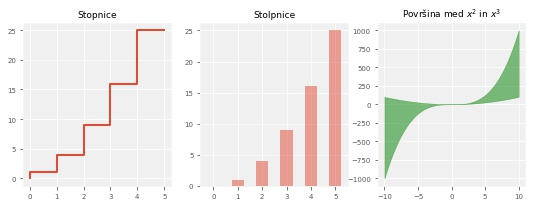

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3))

# Stopnice
axes[0].step(n, n**2, lw=2)
axes[0].set_title("Stopnice")

# Stolpični diagram
axes[1].bar(n, n**2, align="center", width=0.5, alpha=0.5)
axes[1].set_title("Stolpnice")

# Površina med krivuljama kvadratne in kubične funkcije
axes[2].fill_between(x, x**2, x**3, color="green", alpha=0.5);
axes[2].set_title("Površina med $x^2$ in $x^3$");

### Verjetnostne porazdelitve

### Probability distributions

Verjetnosto porazdelitev končnega števila vzorcev pogosto predstavimo s <i>histogramom</i> - stolpičnim diagramom ki predstavlja število oz. verjetnost vrednosti spremenljivke.

Naj bo $x$ naključna spremenljivka, porazdeljena po normalni (Gaussovi) porazdelitvi s sredino $\mu = 0$ in standardnim odklonom $\sigma = 1$.

Vzamimo $N$ naključnih vzorcev spremenljivke $x$. Funkcija `hist` izriše stolpični diagram verjetnostne porazdelitve glede na izide vzorčenj. 


The probability of distributing a finate number of samples is often represented by the <i>histogram</i> - a column diagram representing the number or probability of the value of the variable.

Let $x$ be a random variable distributed over a normal (Gaussian) distribution with the mean $\mu = 0$ and the standard deviation of $\sigma = 1$.

We take $N$ random samples of the variable $x$. The `hist` function displays the bar graph of the probability distribution with respect to the results of the sampling.

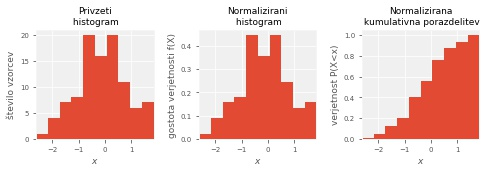

In [14]:
# Histogram verjetnostne porazdelitve števil
N = 100
data = np.random.randn(N) # vzorčimo N točk
fig, axes = plt.subplots(1, 3, figsize=(7, 2.5))

axes[0].hist(data, bins=10)
axes[0].set_title("Privzeti\n histogram")
axes[0].set_xlim((min(data), max(data)));
axes[0].set_ylabel("število vzorcev")
axes[0].set_xlabel("$x$")

axes[1].hist(data,  density=True, bins=10)
axes[1].set_title("Normalizirani\n histogram")
axes[1].set_xlim((min(data), max(data)));
axes[1].set_ylabel("gostota verjetnosti f(X)")
axes[1].set_xlabel("$x$")

axes[2].hist(data, cumulative=True, bins=10, density=True)
axes[2].set_title("Normalizirana\n kumulativna porazdelitev")
axes[2].set_ylabel("verjetnost P(X<x)")
axes[2].set_xlim((min(data), max(data)));
axes[2].set_xlabel("$x$")

fig.tight_layout()

##### Vprašanje 2-1-2

Poizkusi spreminjati število vzorcev `N` in predalčkov `bins`. Ali so katere nastavitve primernejše od drugih v odvisnosti od števila vzorcev?

##### Question 2-1-2

Try to change the number of samples `N` and the number of `bins`. Are any settings more appropriate than others depending on the number of samples?

[Odgovor](202-1.ipynb#Odgovor-2-1-2)

[Answer](202-1.ipynb#Answer-2-1-2)

##### Vprašanje 2-1-3

Funkcija `randn` predpostavlja sredino $\mu = 0$ in standardni odklon $\sigma = 1$. Kako bi modelirali poljubno sredino in standardni odklon, npr. $\mu=5$ in $\sigma=0.5$?

##### Question 2-1-3

The `randn` function assumes the center of $\mu = 0$ and the standard deviation $\sigma = 1$. How to model an arbitrary center and standard deviation, e.g. $\mu=5$ and $\sigma=0.5$?

[Odgovor](202-1.ipynb#Odgovor-2-1-3)

[Answer](202-1.ipynb#Answer-2-1-3)

### Toplotne karte in konture

Toplotne karte (ang. `heatmap`) uporabljamo za prikazovanje funkcij dveh spremenljivk. Narišimo funkcijo dveh spremenljivk:

$$ z = sin(x) cos(y) $$

### Heat maps and contours

Heat maps are used to display the functions of two variables. We draw the function of two variables:

$$ z = sin(x) cos(y) $$

In [15]:
def func(x, y):
    return np.sin(x) * np.cos(y)

In [16]:
x = np.linspace(-np.pi, np.pi, 100)
y = np.linspace(-np.pi, np.pi, 100)
X,Y = np.meshgrid(x, y)
Z = func(X, Y)

V ``matplotlib`` lahko izbiramo med več možnostmi.

In `` matplotlib`` we can choose between several options.

#### Funkcija `pcolor`

#### The `pcolor` function

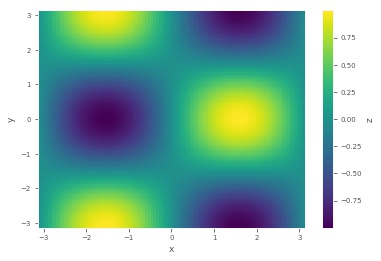

In [17]:
fig, ax = plt.subplots()

p = ax.pcolor(X, Y, Z,)
cb = fig.colorbar(p, ax=ax, label="z")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-np.pi, np.pi)
ax.set_ylim(-np.pi, np.pi);

Modre vrednosti so vbočene v ekran, rumene pa izbočene.

The blue values ​​are embedded in the screen, while the yellow ones are convex.

#### Funkcija `imshow`

Dobimo čistejšo sliko tako, da uporabimo algoritem za interpolacijo.

#### The `imshow` function

We get a cleaner image by using an interpolation algorithm.

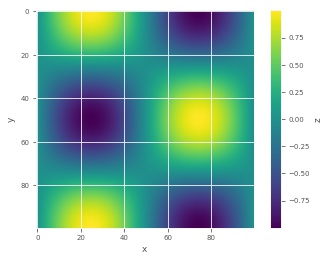

In [18]:
fig, ax = plt.subplots()

im = ax.imshow(Z)
im.set_interpolation('bilinear')
cb = fig.colorbar(im, ax=ax, label="z")
ax.set_xlabel("x")
ax.set_ylabel("y");

#### Funkcija `contour`

Konture uporabimo, da prikažemo točke z enako vrednostjo funkcije - podobno kot z izohipsami povežemo točke z isto višino na zemljevidu.

Narišimo naključno kvadratno funkcijo
$$z = a_1 x^2 + a_2 y^2 + a_3 x y$$
kjer koeficiente $a_1, a_2, a_3$ določimo naključno.

#### The `contour` function

Contours are used to display points with the same value of the function - as with isohypses, we associate points with the same height on the map.

Draw a random square function
$$z = a_1 x^2 + a_2 y^2 + a_3 x y$$
where the coefficients of $a_1, a_2, a_3$ are determined randomly.

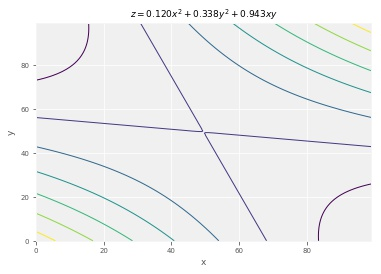

In [19]:
def random_square_function_2D(x, y, a):
    return a[0] * x**2 + a[1] * y**2 + a[2] * x * y

a = np.random.rand(3, 1)
x1 = np.linspace(-np.pi, np.pi, 100)
y1 = np.linspace(-np.pi, np.pi, 100)
X,Y = np.meshgrid(x1, y1)
Z = random_square_function_2D(X, Y, a)

fig, ax = plt.subplots()
im = ax.contour(Z)
ax.set_title("$z = %.3f x^2 + %.3f y^2 + %.3f x y$" % (a[0], a[1], a[2]))
ax.set_xlabel("x")
ax.set_ylabel("y");

### Nadzor nad velikostjo osi

V tem sklopu bomo spremenili velikost slike in nastavili razpon (interval) podatkov, ki bodo prikazani.

### Control over the axis size

In this section, we will change the size of the image and set the range of the data to be displayed.

#### Domet

Za boljšo preglednost slike omejimo zgolj na domeno podatkov: ročno z uporabo `set_ylim` in `set_xlim` ali pa samodejno z `axis('tight')`.

#### Range

For better image clarity, we limit it only to the data domain: manually using `set_ylim` and `set_xlim` or automatically with `axis('tight')`.

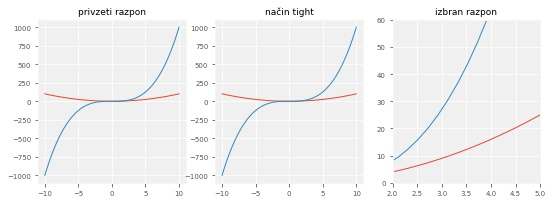

In [20]:
x = np.linspace(-10, 10, 100)

fig, axes = plt.subplots(1, 3, figsize=(9, 3))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('privzeti razpon')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('način tight')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title('izbran razpon');

#### Logaritemska lestvica

Enostavno nastavimo tudi logaritemsko naraščanje intervalov na posameznih oseh.

#### Logarithmic scale

We can simply set the logarithmic increment of intervals on individual axes.

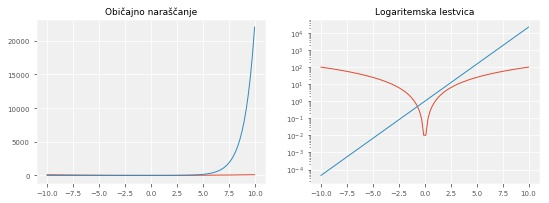

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(9, 3))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Običajno naraščanje")

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logaritemska lestvica");

### Nastavitev oznak na oseh

Z metodama `set_xticks` in `set_yticks` nastavimo <i>lokacije</i> oznak, nato pa z  `set_xticklabels` in `set_yticklabels` eksplicitno določimo oznake.

### Setting the marks on the axes

Using the `set_xticks` and `set_yticks` methods, we set <i>locations</i> of tags, then set the tags explicitly with `set_xticklabels` and `set_yticklabels`.

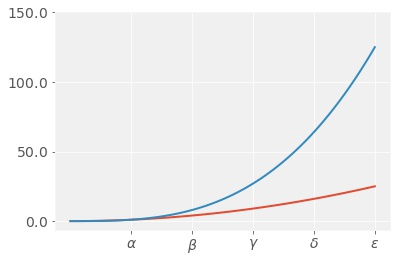

In [22]:
fig, ax = plt.subplots()
x = np.linspace(0, 5, 100)
ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(
    [r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], 
    fontsize=14
)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=14);

### Velikost, razmerje in ločljivost

Velikost slike določamo s `figsize` v palcih (inčah, 1 in = 2.4 cm) ločljivost pa s parametrom `dpi` - število pik (pikslov) na palec. inch). Slednji ukaz ustvari sliko velikosti 1400x600 pik.

### Size, ratio and resolution

The size of the image is determined with `figsize` in inches (inches, 1 in = 2.4 cm) with resolution `dpi` - number of pixels per inch). The latter command creates a 1400x600 pixel image.

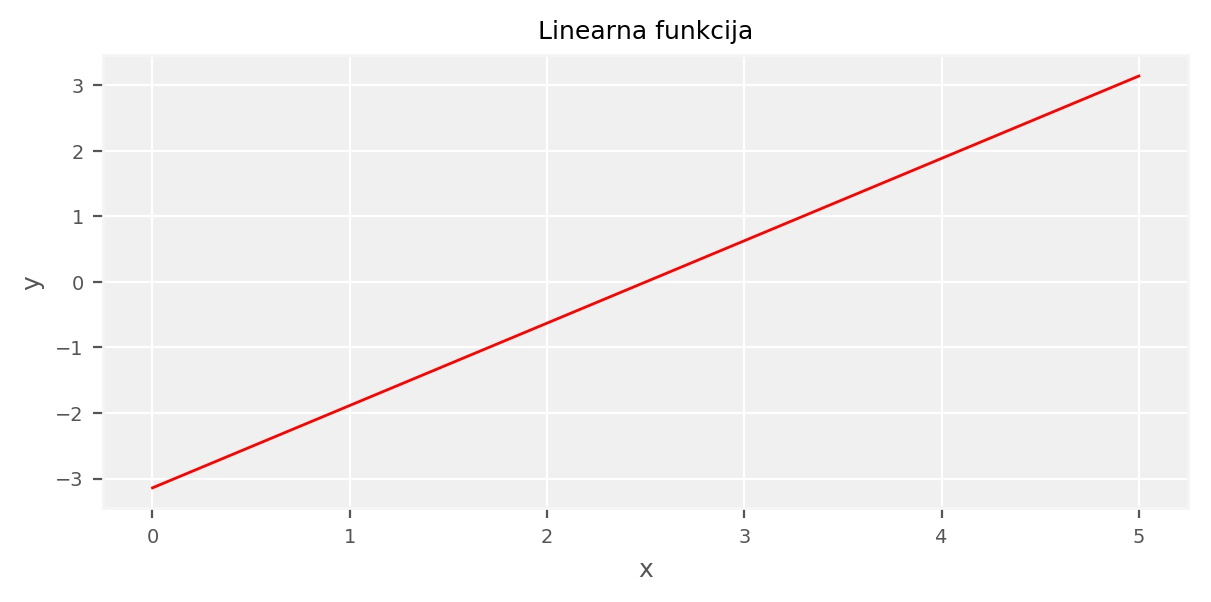

In [23]:
fig, axes = plt.subplots(figsize=(7, 3), dpi=200)

x = np.linspace(0, 5, 100)
y = np.linspace(-np.pi, np.pi, 100)

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('Linearna funkcija');

### Legenda, oznake in naslovi

Za boljšo berljivost slike pogosto dodamo naslov, oznake osi in legendo. Na vseh mestih lahko uporabljamo $\LaTeX$ sintakso. Kvalitetna slika vsebuje večino omenjenih elementov.

### Legend, tags and titles

To better read the image, we often add a title, an axis and a legend. In all places, $\LaTeX$ syntax can be used. A quality picture contains most of the above mentioned items.

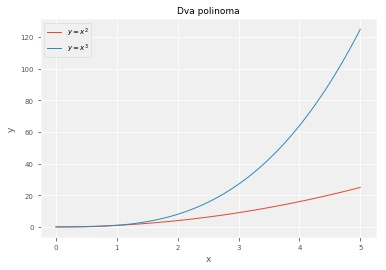

In [24]:
fig, ax = plt.subplots()

ax.plot(x, x**2, label="$y = x^2$")
ax.plot(x, x**3, label="$y = x^3$")
ax.legend(loc=2) # upper left corner
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Dva polinoma');

### Shranjevanje slike

Za shranjevanje uporabimo metodo `savefig`, kjer lahko izbiramo med formati PNG, JPG, EPS, SVG, PGF in PDF.

### Saving an image

To save, we use the `savefig` method, where we can choose between PNG, JPG, EPS, SVG, PGF and PDF formats.

In [25]:
fig.savefig('slika.png')

Ločljivost nastavimo v enotah DPI.

Set resolution in DPI units.

In [26]:
fig.savefig('slika.png', dpi=200)